## The Normal Equation

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

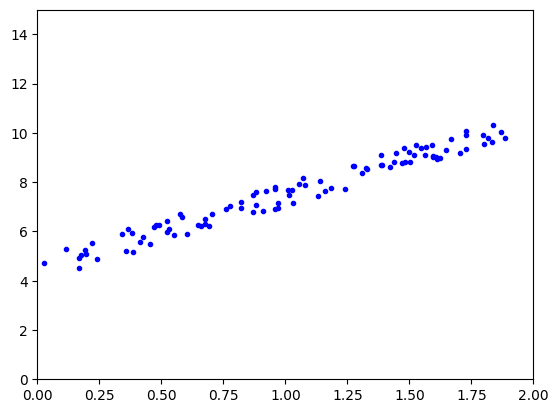

In [2]:
import matplotlib.pyplot as plt
plt.axis([0,2,0,15])
plt.plot(X, y, 'b.')

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.55823409],
       [2.94443347]])

In [4]:
X_new = np.array(([0], [2]))
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.55823409],
       [10.44710104]])

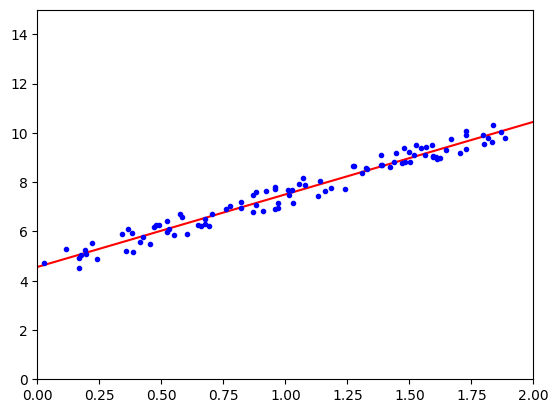

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.55823409]), array([[2.94443347]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.55823409],
       [10.44710104]])

### Least Squares

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [9]:
theta_best_svd

array([[4.55823409],
       [2.94443347]])

### Psuedoinverse

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.55823409],
       [2.94443347]])

## Batch Gradient Descent

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.55823409],
       [2.94443347]])

## Stochastic Gradient Descent with learning schedule

In [16]:
n_epochs = 50
t0,  t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.55676429],
       [2.93527249]])